# Intro to Inputting and Visualizing Data

In this section, we dicuss how to input and interpret basic ocean data.

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `scipy.io.netcdf` package to let us import data from another file.

In [9]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


## Inputting the Data

We use the function `scipy.io.netcdf_file` to input data from a destined file to a variable, or handle, that will store the data.

In [10]:
ncf = scipy.io.netcdf_file('example_data/WOA13_annual_SST_nc3_classic.nc')
ncf.variables

OrderedDict([('lat', <scipy.io.netcdf.netcdf_variable at 0x88321d0>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x8832208>),
             ('tos', <scipy.io.netcdf.netcdf_variable at 0x8832240>)])

We assign the variables la

In [11]:
lat = ncf.variables['lat']
lon = ncf.variables['lon']
tos = ncf.variables['tos']

## Attempted Installs

### Attempt 1: Installing via Homebrew
I attempted to use ncdump from the command below to generate the appropriate metadata from command line. However, I ran into quite a bit of trouble trying to install ncdump. Here is a recap of what I went through trying to get these modules to install:

`ncdump -h 'example_data/WOA13_annual_SST_nc3_classic.nc'`

`sudo xcodebuild -license accept` - On my Mac, I had to update xcode because I was trying to use Homebrew to install netcdf.

`brew install netcdf` - using Homebrew here (took a couple of minutes)- ultimately failed. I also tried `brew install netcdf4` and `brew install hdf5`.

Each time I tried installing, I always ran into trouble when Homebrew executed the make file.

### Attempt 2: Installing via Conda
I tried to install netcdf4 to my environment by running the following:
`conda install -n Py2 netcdf4`

While this successfully downloaded, I still had errors when I tried to execute `import netcdf4`- no module named netCDF4

Googling and looking at StackOverflow suggested that this might be because my numpy was outdated. However even after updating conda and numpy, it still didn't work.

### Attempt 3: Directly cloning from GitHub

Didn't work for me: https://github.com/Unidata/netcdf4-python

### Getting all attributes from each handle
After all the various installs failed, I used the built in `_attributes` method to access all the attributes of each of the variables. Below is the output of all the attributes for lat, lon, and tos.

* Referenced: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.netcdf.netcdf_variable.html
The documentation mentioned `attributes`, but running `var.attributes` did not work. Is this different from `var._attributes`?

To get all object attributes displayed in full, replace `var._attributes` with `var.__dict__`

In [22]:
print("Lat attributes:", lat._attributes)
print("Lon attributes:", lat._attributes)
print("Tos attributes:", tos._attributes)

('Lat attributes:', OrderedDict([('standard_name', 'latitude'), ('long_name', 'latitude'), ('units', 'degrees_north'), ('axis', 'Y'), ('bounds', 'lat_bnds')]))
('Lon attributes:', OrderedDict([('standard_name', 'latitude'), ('long_name', 'latitude'), ('units', 'degrees_north'), ('axis', 'Y'), ('bounds', 'lat_bnds')]))
('Tos attributes:', OrderedDict([('standard_name', 'sea_surface_temperature'), ('long_name', 'Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.'), ('coordinates', 'time lat lon depth'), ('cell_methods', 'area: mean depth: mean time: mean'), ('grid_mapping', 'crs'), ('units', 'degrees_celsius'), ('_FillValue', 9.96921e+36)]))


## Variable Metadata
The metadata is "data that provides other information about other data". In this case the metadata for each latitude, longitude, and sea surface temperature is listed under each of them below. We see that the metadata gives us specific attributes of these variables that we can then access. From the metadata, we are able to get more specific information about the variables. For example, we see that sea surface temperature has coordinates measured in time, latitude, longitude, and depth. 

### Latitude (lat)
- standard_name: latitude
- long_name: latitude
- units: degrees_north
- axis: Y
- bounds: lat_bnds

### Longitude (lon)
- standard_name: longitude
- long_name: longitude
- units: degrees_east
- axis: X
- bounds: lon_bnds

### Sea Surface Temperature (tos)
- standard_name: sea_surface_temperature
- long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
- coordinates: time lat lon depth
- cell_methods: 
  * area: mean depth
  * mean time: mean
- grid_mapping: crs
- units: degrees_celsius
- _fillValue: 9.96921e+36

We will include some examples of accessing various variable metadata below:

In [21]:
print('Sea Surface Temperature units: ', tos.units)
print('Sea Surface Temperature coordinates: ', tos.coordinates)
print('Latitude axis: ', lat.axis)
print('Longitude axis: ', lon.axis)

('Sea Surface Temperature units: ', 'degrees_celsius')
('Sea Surface Temperature coordinates: ', 'time lat lon depth')
('Latitude axis: ', 'Y')
('Longitude axis: ', 'X')


We can similarly access other metadata by calling any of the other attributes listed above for the appropriate variable. 

## Plotting Sea Surface Temperature

We see that our three variable represent latitude, longitude and sea surface temperature, respectively. We will soon plot sea surface temperature data, but first must understand how to access this data.

Let us try to access the data at a specific point, say `(lat, lon) = (96, 25)`, by running the following command.

In [24]:
tos[96, 25]

27.82729

We find that at this point, our sea surface temperature is about 27.8 degrees Celsius. Additionally, we find the temperature at a few more points (and make the output cleaner by formatting the print statements).

In [45]:
print 'Temp. at (90, 0):', tos[90, 0]
print 'Temp. at (90, 100):', tos[90, 100]

Temp. at (90, 0): 28.432291
Temp. at (90, 100): 9.96921e+36


At the point (90, 0), we find the temperature to be about 28.4 degrees. However, at (90, 100), we find the temperature to be of an astronomical magnitude. To explain this, we must consider that some points may correspond to land and thus not have any data for sea surface height. For these missing values, netcdf will fill in the missing data with a certain value (usually called a fill value or missing value), which we can identify in the attributes of the tos variable.

In [31]:
tos._FillValue

9.96921e+36

We find that the value at `(lat, long) = (90, 100)` does in fact coincide with the fill value, meaning this point has no data for `tos`, and thus corresponds to land, rather than ocean.

If we plot sea surface temperature using this data and `plt.pcolormesh()`, we will find that our plot will be composed of binary colors due to this fill value.

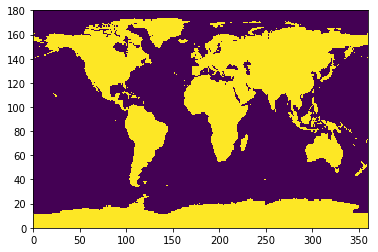

In [47]:
# Because tos itself is a netcdf_variable object, we need to perform an array slice to get its array value for plotting.
print(tos)
plt.pcolormesh( tos[:] )

In the plot above, we see that sea surface temperature for the land masses was colored yellow due to the fil value. Because sea surface temperature is irrelevant to our land masses, we will mask the hidden values and plot the map again so that the coloring excludes the continents.

In [37]:
# helper function for masking arrays with missing values
def maskArray(handle):
    return numpy.ma.array(handle[:], mask=(handle[:] == handle._FillValue))

In [39]:
masked = maskArray(tos)

In [48]:
print 'Temp. at (90, 0):', masked[90, 0]
print 'Temp. at (90, 100):', masked[90, 100]

Temp. at (90, 0): 28.432291
Temp. at (90, 100): --


We see that the surface temperature at `(90, 0)` is the same as before while at `(90, 100)` there is no data (as there shouldn't be). We can now accurately plot sea surface temperature

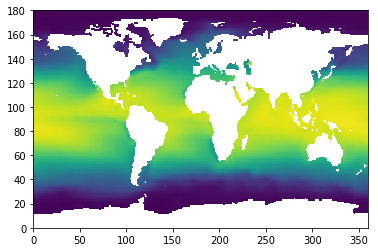

In [49]:
plt.pcolormesh( masked )

Finally, we change the color scheme for the plot and insert a color bar.

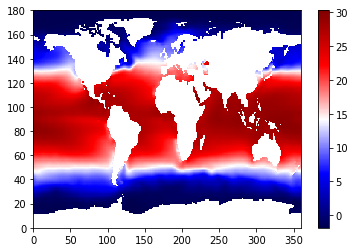

In [50]:
plt.pcolormesh( masked, cmap=cm.seismic ); plt.colorbar();